In [1]:
print("Hello world")

Hello world


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install psycopg2-binary


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------------------------------------ --- 1.0/1.2 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 5.2 MB/s eta 0:00:00


In [5]:
"""""
Use python to create a simple ETL data pipeline to extract, transform and load weather 
from a REST API to save as a CSV file
"""
#import os
import requests
import pandas as pd
from datetime import datetime
import psycopg2  #DB Adapter for python - Connecting to PostgreSQL & executing queries
from sqlalchemy import create_engine #Efficiently manage & reuse db connections
#from dotenv import load_dotenv


##load sensitive data from .env
#load_dotenv()
#api_key = os.getenv("API_KEY")
API_KEY = '92ac1561e5d0eccf9f54619896ddc504'
CITY = 'Nairobi'

# PostgreSql db credentials
DB_USER = 'postgres'
DB_PASSWORD = 'admin1234'
DB_HOST = 'localhost'  # or your database host
DB_PORT = '5432'       # default PostgreSQL port
DB_NAME = 'weather_db'


# Define a base url for Open Weather  - fstring
URL = f'http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric'




# Extract data
def extract():
    response = requests.get(URL)
    data = response.json()
    return data

## Transform data
def transform(data):
    transformed_data = {
        'city': data['name'],
        'temperature': data['main']['temp'],
        'humidity': data['main']['humidity'],
        'weather': data['weather'][0]['description'],
        'timestamp': datetime.now()
    }
    return transformed_data

## Load data
def load(data):
    df = pd.DataFrame([data])
   # df.to_csv('weather_data.csv', mode='a', header=not pd.io.common.file_exists('weather_data.csv'), index=False)
    #print("Data Loaded successfuly")
    # Establish a connection using SQLAlchemy Engine
    engine = create_engine(f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
    # Load data into PostgreSQL
    table_name = 'weather_data'
    df.to_sql(table_name, engine, if_exists='append', index=False)
    print('Data loaded successfully into PostgreSQL.')


    # Close the engine connection 
    engine.dispose()

def run_etl():
    raw_data = extract()
    processed_data = transform(raw_data)
    load(processed_data)

if __name__ == '__main__':
    run_etl()



Data loaded successfully into PostgreSQL.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# 1. Connect to the PostgreSQL Database and Load Data

In [12]:
import pandas as pd
from sqlalchemy import create_engine

# Replace with your actual database credentials
db_user = 'postgres'
db_password = 'admin1234'
db_host = 'localhost'
db_port = '5432'
db_name = 'weather_db'

# Create the database engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

# Load data into a DataFrame
df = pd.read_sql('SELECT * FROM weather_data', engine)

# Display the first few rows
print(df)

# Get a summary of the dataset
df.info()

# Statistical summary
df.describe()

# Check for missing values
df.isnull().sum()



      city  temperature  humidity        weather                  timestamp
0  Nairobi        19.47        82  moderate rain 2025-04-19 18:11:44.158468
1  Nairobi        19.47        82  moderate rain 2025-04-19 18:13:13.438553
2  Nairobi        17.54        91  moderate rain 2025-04-20 22:03:43.963528
3  Nairobi        17.54        91  moderate rain 2025-04-20 22:08:54.638482
4  Nairobi        17.24        91  moderate rain 2025-04-20 22:33:08.710918
5  Nairobi        17.24        91  moderate rain 2025-04-20 22:45:47.575682
6  Nairobi        17.24        91  moderate rain 2025-04-20 22:53:22.729879
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         7 non-null      object        
 1   temperature  7 non-null      float64       
 2   humidity     7 non-null      int64         
 3   weather      7 non-null      object       

city           0
temperature    0
humidity       0
weather        0
timestamp      0
dtype: int64

# Exploratory Data Analysis (EDA)

In [7]:
# Get a summary of the dataset
df.info()

# Statistical summary
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   city         7 non-null      object        
 1   temperature  7 non-null      float64       
 2   humidity     7 non-null      int64         
 3   weather      7 non-null      object        
 4   timestamp    7 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 412.0+ bytes


city           0
temperature    0
humidity       0
weather        0
timestamp      0
dtype: int64

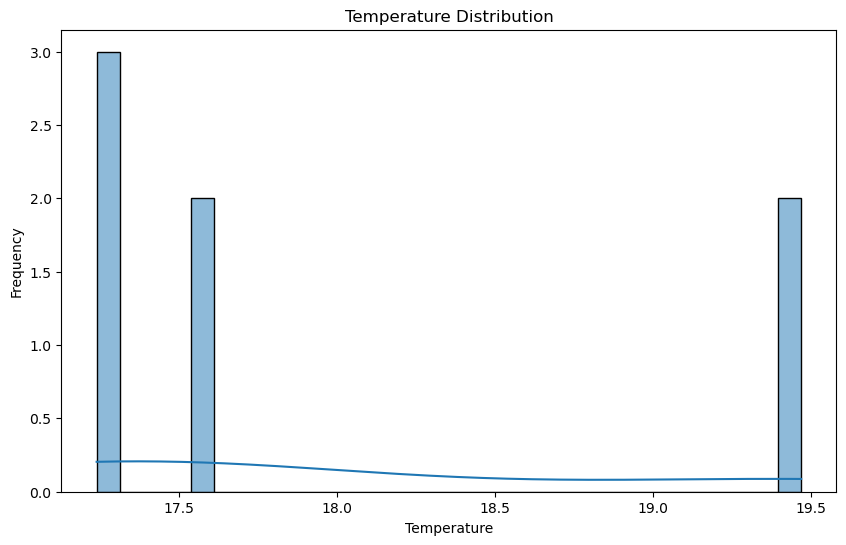

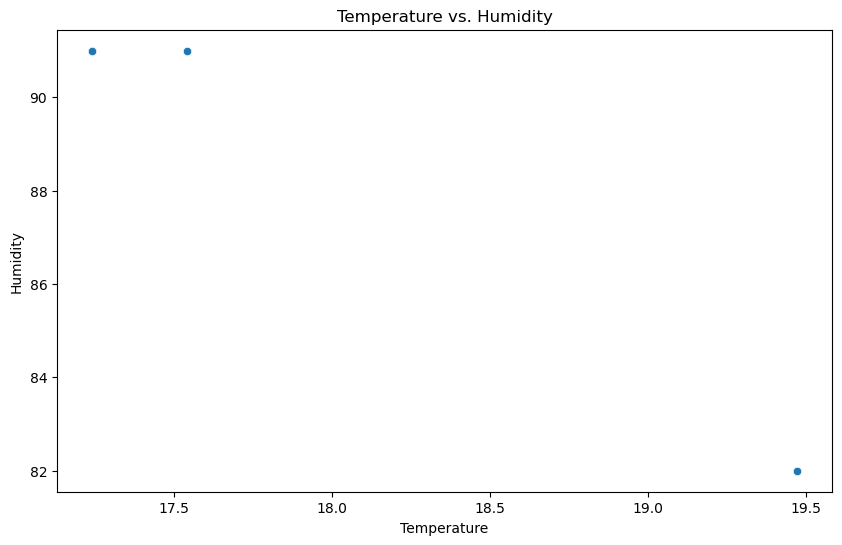

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of temperature vs. humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', data=df)
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

In [14]:
# Convert timestamp to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract date-related features
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['hour'] = df['timestamp'].dt.hour

# One-hot encode the 'weather' categorical variable
df = pd.get_dummies(df, columns=['weather'], drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
features = ['humidity', 'day_of_week', 'month', 'hour'] + [col for col in df.columns if col.startswith('weather_')]
X = df[features]
y = df['temperature']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 4.45
R-squared: 0.00


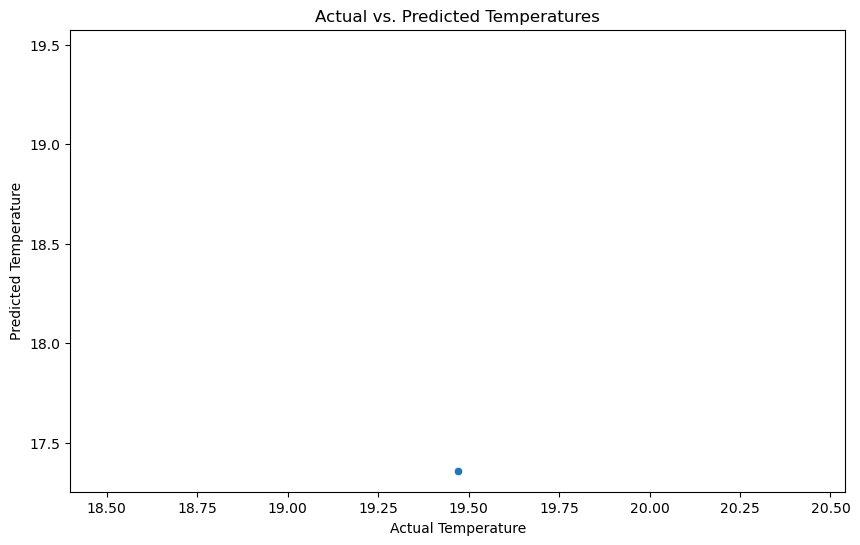

In [16]:
# Scatter plot of actual vs. predicted temperatures
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Temperatures')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()